In [2]:
# Import the necessary packages

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from imutils import paths
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
import cv2
import os

Loading Face Detector Model...
Loading Trained Face Mask Detector Model...
Computing Face Detections...

Pridiction with Mask 1.0


Pridiction without Mask 3.144293e-09


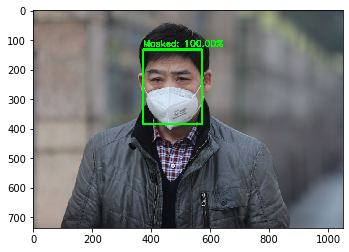

In [4]:

# load our serialized face detector model from disk
print("Loading Face Detector Model...")
face_detector="./Face_Detector"
prototxtPath = os.path.sep.join([face_detector, "deploy.prototxt"])
weightsPath = os.path.sep.join([face_detector,"res10_300x300_ssd_iter_140000.caffemodel"])
net = cv2.dnn.readNet(prototxtPath, weightsPath)
print("Loading Trained Face Mask Detector Model...")
Trained_Model="Mask_Detector_Model.model"
model = load_model(Trained_Model)
test_image="./Test_Images/test_7.jpeg"
image=cv2.imread(test_image)
(h,w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),(104.0, 177.0, 123.0))

# pass the blob through the network and obtain the face detections
print("Computing Face Detections...")
net.setInput(blob)
detections = net.forward()
# loop over the detections
for i in tf.range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the detection
    confidence = detections[0, 0, i, 2]
    if confidence>0.5:
        # compute the (x, y)-coordinates of the bounding box for the object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        (startX, startY) = (max(0, startX), max(0, startY))
        (endX, endY) = (min(w-1,endX), min(h-1,endY))

        face = image[startY:endY, startX:endX]
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face = cv2.resize(face, (224, 224))
        face = img_to_array(face)
        face = preprocess_input(face)
        face = np.expand_dims(face, axis=0)
        (mask, withoutMask) = model.predict(face)[0]
        print("\nPridiction with Mask",mask)
        print()
        print("\nPridiction without Mask",withoutMask)
        # determine the class label and color we'll use to draw box & text
        if mask > withoutMask:
            label = "Masked"
            color = (0, 255, 0)
        else:
            label = "Non Masked"
            color = (0,0,255)
        label = "{}: {:.2f}%".format(label, max(mask,withoutMask) * 100)
        cv2.putText(image, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.99, color, 4)
        cv2.rectangle(image, (startX, startY), (endX, endY), color, 5)
    
#To display the result 
imgrgb = image[:,:,::-1]
plt.imshow(imgrgb)
plt.show()